# Practice Assignment

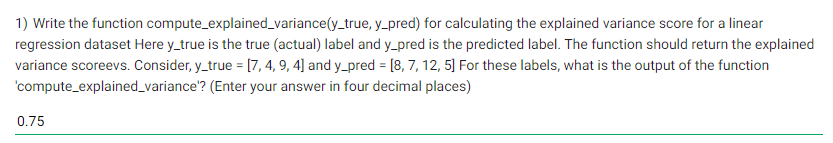

In [ ]:
from sklearn.metrics import explained_variance_score

def compute_explained_variance(y_true,y_pred):
  return explained_variance_score(y_true,y_pred)

y_true = [7,4,9,4]
y_pred = [8,7,12,5]
compute_explained_variance(y_true,y_pred)

0.7777777777777778

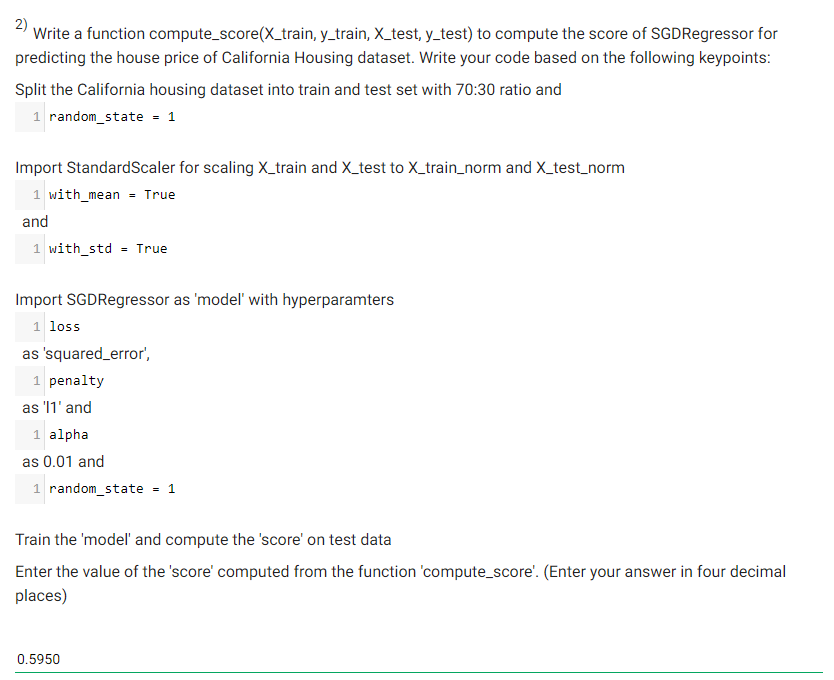

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
X,y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)
def compute_score(X_train, X_test, y_train, y_test):
  pipe = Pipeline([('scale', StandardScaler()),
                   ('sgd', SGDRegressor(penalty='l1', alpha=0.01, random_state=1))])
  pipe.fit(X_train,y_train)
  return pipe.score(X_test,y_test)
compute_score(X_train, X_test, y_train, y_test)

0.5951040704728554

# Graded Assignment

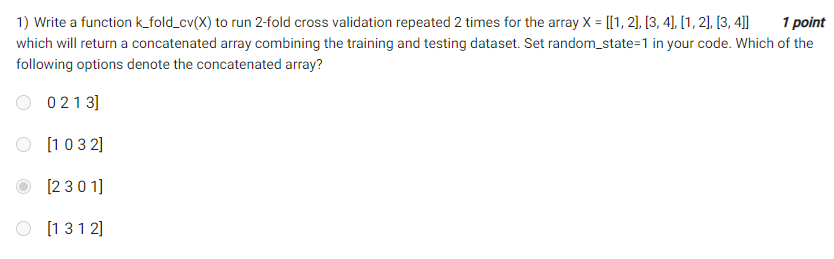

In [ ]:
from sklearn.model_selection import RepeatedKFold
X = [[1,2],[3,4],[1,2],[3,4]]
def k_fold_cv(X):
  k = RepeatedKFold(n_repeats=2, n_splits=2,random_state=1)
  for tr, ts in k.split(X):
    tr,ts = tr,ts
  return tr,ts
str(k_fold_cv(X))

'(array([0, 2]), array([1, 3]))'

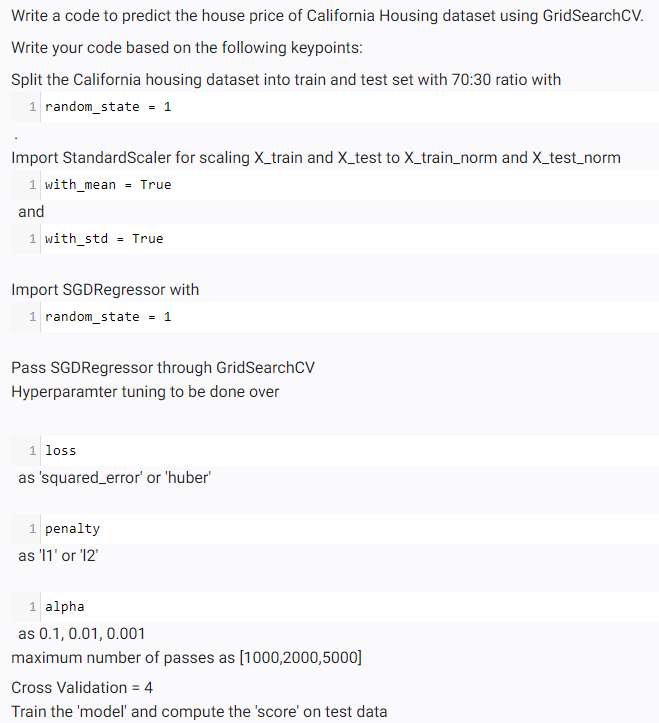

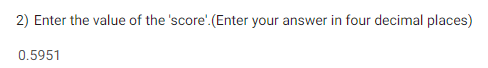

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
X,y = fetch_california_housing(as_frame=True,return_X_y=True)
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.3, random_state=1)
ss = StandardScaler()
X_train_norm = ss.fit_transform(X_train)
X_test_norm = ss.transform(X_test)
sgd = SGDRegressor(random_state=1)
params = {'loss':['squared_error','huber'],'penalty':['l1','l2'],'alpha':[0.1,0.01,0.001],'max_iter':[1000,2000,5000]}
gscv = GridSearchCV(sgd,param_grid=params,cv=4)
gscv.fit(X_train_norm, y_train)
gscv.score(X_test_norm,y_test)

0.5951040704728554

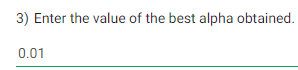

In [ ]:
gscv.best_params_

{'alpha': 0.01, 'loss': 'squared_error', 'max_iter': 1000, 'penalty': 'l1'}

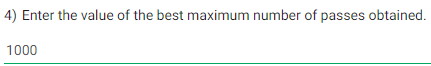

In [ ]:
gscv.best_params_

{'alpha': 0.01, 'loss': 'squared_error', 'max_iter': 1000, 'penalty': 'l1'}

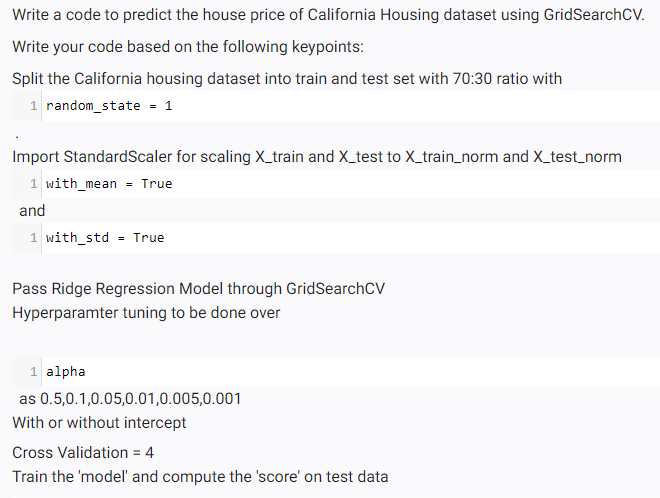

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X,y = fetch_california_housing(as_frame=True, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)
ss = StandardScaler()
X_train_norm = ss.fit_transform(X_train)
X_test_norm = ss.transform(X_test)

params = {'alpha':[0.5,0.1,0.05,0.01,0.005,0.001], 'fit_intercept':[True,False]}
gscv = GridSearchCV(Ridge(),params,cv=4)
gscv.fit(X_train_norm,y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': [0.5, 0.1, 0.05, 0.01, 0.005, 0.001],
                         'fit_intercept': [True, False]})

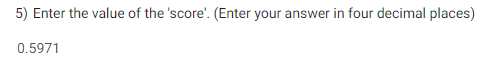

In [5]:
gscv.score(X_test_norm,y_test)

0.597145061224877

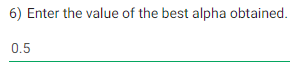

In [6]:
gscv.best_estimator_

Ridge(alpha=0.5)

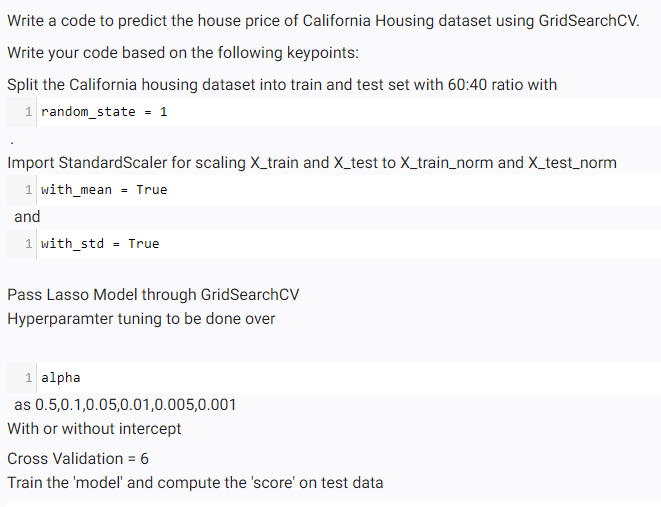

In [15]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

X,y = fetch_california_housing(as_frame=True, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=1)
ss = StandardScaler()
X_train_norm = ss.fit_transform(X_train)
X_test_norm = ss.transform(X_test)

params = {'alpha':[0.5,0.1,0.05,0.01,0.005,0.001], 'fit_intercept':[True,False]}
gscv = GridSearchCV(Lasso(),params,cv=6)
gscv.fit(X_train_norm,y_train)

GridSearchCV(cv=6, estimator=Lasso(),
             param_grid={'alpha': [0.5, 0.1, 0.05, 0.01, 0.005, 0.001],
                         'fit_intercept': [True, False]})

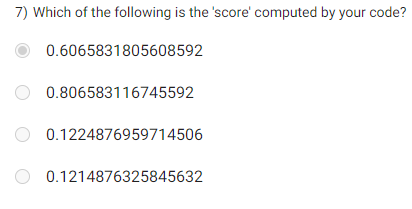

In [16]:
gscv.score(X_test_norm,y_test)

0.6047829320240279

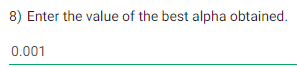

In [17]:
gscv.best_params_

{'alpha': 0.005, 'fit_intercept': True}